### Aliexpress Intern Test (round #1)
##### Арапов Степан

Первый раунд тестового задания. Проделаем простое упражнения с фит-предиктом моделей, визуализацией и матричной алгеброй.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from lightgbm import LGBMRegressor, plot_importance


### A. Dataset

In [2]:
data = pd.read_csv('energydata_complete.csv.zip')
data.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
data.date = pd.to_datetime(data.date)
data['week'] = data.date.dt.weekofyear
data = data[(data.week > 2) & (data.week < 21)]
data.set_index('date', inplace=True)

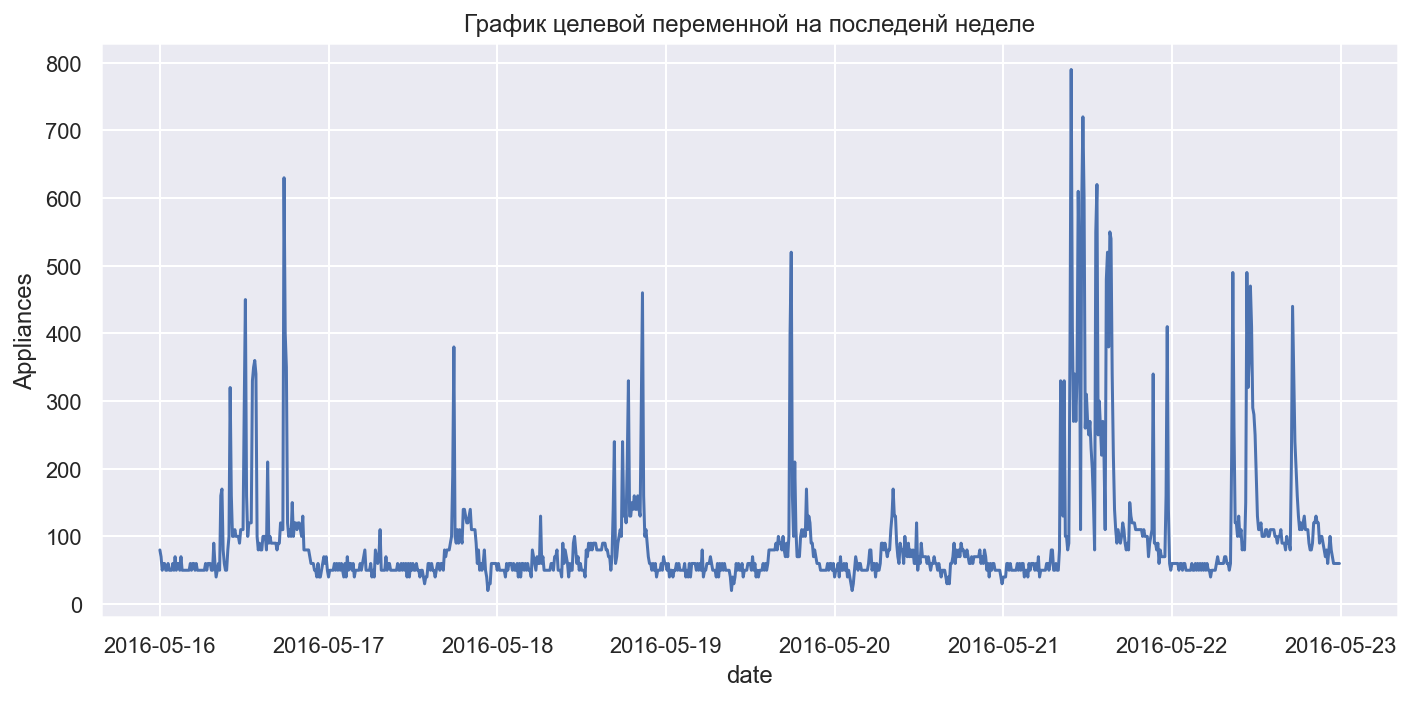

In [5]:
plt.figure(figsize=(10, 5))
plt.title('График целевой переменной на последенй неделе')
sns.lineplot(data = data[data['week']==20]['Appliances'].sort_index())
plt.tight_layout()

### B. Validation

In [6]:
y_train = data[data.week < 19].Appliances
X_train = data.drop('Appliances', axis=1)[data.week < 19]

y_val = data[data.week >= 19].Appliances
X_val = data.drop('Appliances', axis=1)[data.week >= 19]

# Отложенная выборка

##### *Альтернативное задание

In [7]:
X_train1, y_train1 = data.drop('Appliances', axis=1)[data.week < 11], data[data.week < 11].Appliances
X_fold1, y_fold1 = data.drop('Appliances', axis=1)[(data.week >= 11) & (data.week < 13)], data[(data.week >= 11) & (data.week < 13)].Appliances

X_train2, y_train2 = data.drop('Appliances', axis=1)[data.week < 13], data[data.week < 13].Appliances
X_fold2, y_fold2 = data.drop('Appliances', axis=1)[(data.week >= 13) & (data.week < 15)], data[(data.week >= 13) & (data.week < 15)].Appliances
            
X_train3, y_train3 = data.drop('Appliances', axis=1)[data.week < 15], data[data.week < 15].Appliances,
X_fold3, y_fold3 = data.drop('Appliances', axis=1)[(data.week >= 15) & (data.week < 17)], data[(data.week >= 15) & (data.week < 17)].Appliances
            
X_train4, y_train4 = data.drop('Appliances', axis=1)[data.week < 17], data[data.week < 17].Appliances,
X_fold4, y_fold4 = data.drop('Appliances', axis=1)[(data.week >= 17) & (data.week < 19)], data[(data.week >= 17) & (data.week < 19)].Appliances
            
X_train5, y_train5 =  data.drop('Appliances', axis=1)[data.week < 19], data[data.week < 19].Appliances,
X_fold5, y_fold5 = data.drop('Appliances', axis=1)[(data.week >= 19) & (data.week < 21)], data[(data.week >= 19) & (data.week < 21)].Appliances

### C. Feature Extraction

In [8]:
lgbm = LGBMRegressor(max_depth=4, n_estimators=200)
lgbm.fit(X_train, y_train);

# leaf-wise Разбивается узел, который даст наибольшее количество "информации". Могут получиться несбалансированные деревья.
# depth-wise На очердном этапе разбиваются все узлы (листья). Деревья сбалансированны.

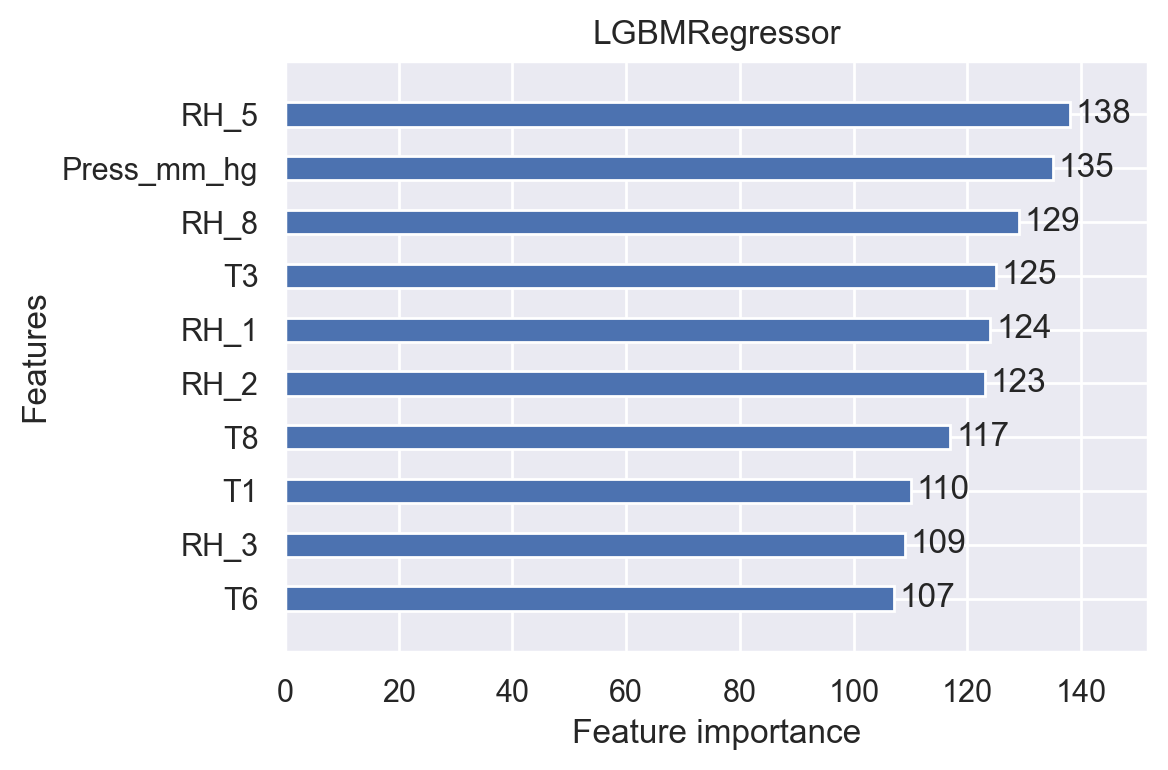

In [9]:
plot_importance(lgbm, max_num_features=10, title='LGBMRegressor', height=0.45, dpi = 100)
plt.tight_layout()

In [ ]:
#

##### *Альтернативное задание

In [10]:
lgbm1 = LGBMRegressor(max_depth=4, n_estimators=200)
lgbm1.fit(X_train1, y_train1);

lgbm2 = LGBMRegressor(max_depth=4, n_estimators=200)
lgbm2.fit(X_train2, y_train2);

lgbm3 = LGBMRegressor(max_depth=4, n_estimators=200)
lgbm3.fit(X_train3, y_train3);

lgbm4 = LGBMRegressor(max_depth=4, n_estimators=200)
lgbm4.fit(X_train4, y_train4);

lgbm5 = LGBMRegressor(max_depth=4, n_estimators=200)
lgbm5.fit(X_train5, y_train5);

In [11]:
feature_importances = pd.DataFrame(data = np.array([lgbm1.feature_importances_,
                              lgbm2.feature_importances_,
                              lgbm3.feature_importances_,
                              lgbm4.feature_importances_,
                              lgbm5.feature_importances_]).T,
             index= lgbm1.feature_name_)

# сортировка по среднему значению и переиндексация датафрейма
feature_importances = feature_importances.reindex(feature_importances.T.mean().sort_values().index)

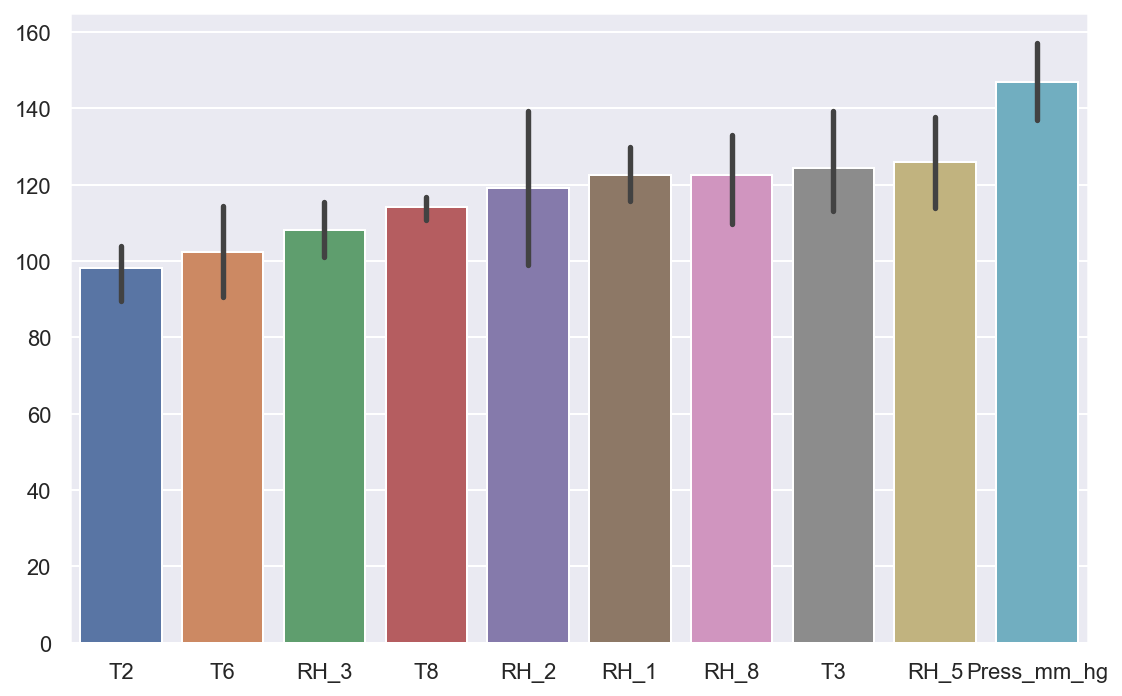

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importances.tail(10).T)
plt.tight_layout()

#### Leafs

In [13]:
# Посчитаем количество узлов и листьев:

# D=0 => N = 2^0
# D=1 => N = 2^0 + 2^1
# D=2 => N = 2^0 + 2^1 + 2^2
#         ...
# D=k => N = 2^0 + ... + 2^k

# Чтобы посчитать листья нужно оставить только последнее слагаемое:

# D=k => L = 2^k 

In [14]:
train_predictions, val_predictions = lgbm.predict(X_train, pred_leaf=True), lgbm.predict(X_val, pred_leaf=True)

train_predictions, train_predictions.shape

(array([[ 6, 13,  6, ...,  6,  0,  3],
        [ 6, 13,  6, ...,  6,  0,  3],
        [ 6, 13,  6, ...,  6,  0,  3],
        ...,
        [ 4,  5,  4, ...,  9,  0, 10],
        [ 4,  5,  4, ...,  9,  0, 10],
        [ 4,  5,  4, ...,  9,  0, 10]]),
 (16128, 200))

In [15]:
# Максимальная глубина 4, значит листьев 16. Всего деревьев 200. (Из заданных гиперпараметров)
# Создадим вектор ,содержащий члены арифметической прогрессии, и прибавим его к нашим исходным векторам.

train_predictions_global = train_predictions + np.arange(0, 16 * 200, 16)
val_predictions_global = val_predictions + np.arange(0, 16 * 200, 16)

print('Train:\n',
      train_predictions[0:10,0:10], '\n\n', train_predictions_global[0:10,0:10], '\n\n',
      train_predictions.shape, '\n', train_predictions_global.shape, '\n\n',
      'Validation:\n',
      val_predictions[0:10,0:10], '\n\n', val_predictions_global[0:10,0:10], '\n\n',
      val_predictions.shape, '\n', val_predictions_global.shape, '\n\n',
      
     )

Train:
 [[ 6 13  6 11 15  5 14 14  1  8]
 [ 6 13  6 11 15  5 14 14  1  8]
 [ 6 13  6 11 15  5 14 14  1  8]
 [ 6 13  6 11 15  5 14 14 10  8]
 [ 8  7  8  7 11 12  9  9  1  8]
 [ 8  7  8  7 11 12  9  9  1  8]
 [ 8  7  8  7 11 12  9  9  1  8]
 [ 8  7  8  7 11 12  9  9  1  8]
 [ 6 13  6 11 13  5 12 14  1  8]
 [ 8  7  8  7 11 12  9  9  1  8]] 

 [[  6  29  38  59  79  85 110 126 129 152]
 [  6  29  38  59  79  85 110 126 129 152]
 [  6  29  38  59  79  85 110 126 129 152]
 [  6  29  38  59  79  85 110 126 138 152]
 [  8  23  40  55  75  92 105 121 129 152]
 [  8  23  40  55  75  92 105 121 129 152]
 [  8  23  40  55  75  92 105 121 129 152]
 [  8  23  40  55  75  92 105 121 129 152]
 [  6  29  38  59  77  85 108 126 129 152]
 [  8  23  40  55  75  92 105 121 129 152]] 

 (16128, 200) 
 (16128, 200) 

 Validation:
 [[4 5 4 9 4 8 8 4 1 1]
 [4 5 4 9 4 8 8 4 1 1]
 [4 5 4 9 4 8 8 4 1 1]
 [4 5 4 9 4 8 8 4 1 1]
 [4 5 4 9 4 8 8 4 1 1]
 [4 5 4 9 4 8 8 4 1 1]
 [4 5 4 9 4 8 8 4 1 1]
 [4 5 4 9 4 8 8 4 1

In [16]:
def row_one_hot_encode(row: np.array) -> np.array:
    one_hot = np.zeros(3200)
    one_hot[row] = 1
    return one_hot

train_ohe = np.apply_along_axis(row_one_hot_encode, axis=1, arr=train_predictions_global)
val_ohe = np.apply_along_axis(row_one_hot_encode, axis=1, arr=val_predictions_global)

#train_ohe = train_ohe.astype(np.int8)
#val_ohe = val_ohe.astype(np.int8)

train_ohe.shape, val_ohe.shape

((16128, 3200), (2016, 3200))

### D. Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(train_ohe, y_train)

lr_l1 = Lasso(alpha=2/3)
lr_l1.fit(train_ohe, y_train)

Lasso(alpha=0.6666666666666666)

In [18]:
(lr.coef_ > 0).sum(), (lr_l1.coef_ > 0).sum()

(1472, 64)

In [19]:
print('Отключилось ',round((1472-64) / 1472,3)*100, '% признаков', sep='')

# l1 регуляризация отбирает признаки (зануляет веса некоторых признаков)
# l2 резугяризация накладывает запрет на большие веса, не позволяя тем самым переобучаться

# Разберёмся почему так происходит
# Рассмотрим двумерный вектор весов w = (1, e), где 0 < |e| < 1. Посмотрим, что выгоднее уменьшить с точки зрения l1 и l2 норм
# |1-с, e|2 = 1 -2c + c^2 + e^2 
# |1, e-c|2 = 1 -2ec + c^2 + e^2
# |1-c, e|1 = 1 - c + e
# |1, e - c|1 = 1 - c + e
# Как видно, с точки зрения l1 нормы нет разницы уменьшать большой вес или маленький.
# Для l2 же разница есть, а именно лучше уменьшить вес побольше.
# Получается шансов занулить маленькие веса у l1 гораздо больше чем у l2.
# Значит l1 хорошо подходит для отбора признаков, а l2 для борьбы с переобучением.

Отключилось 95.7% признаков


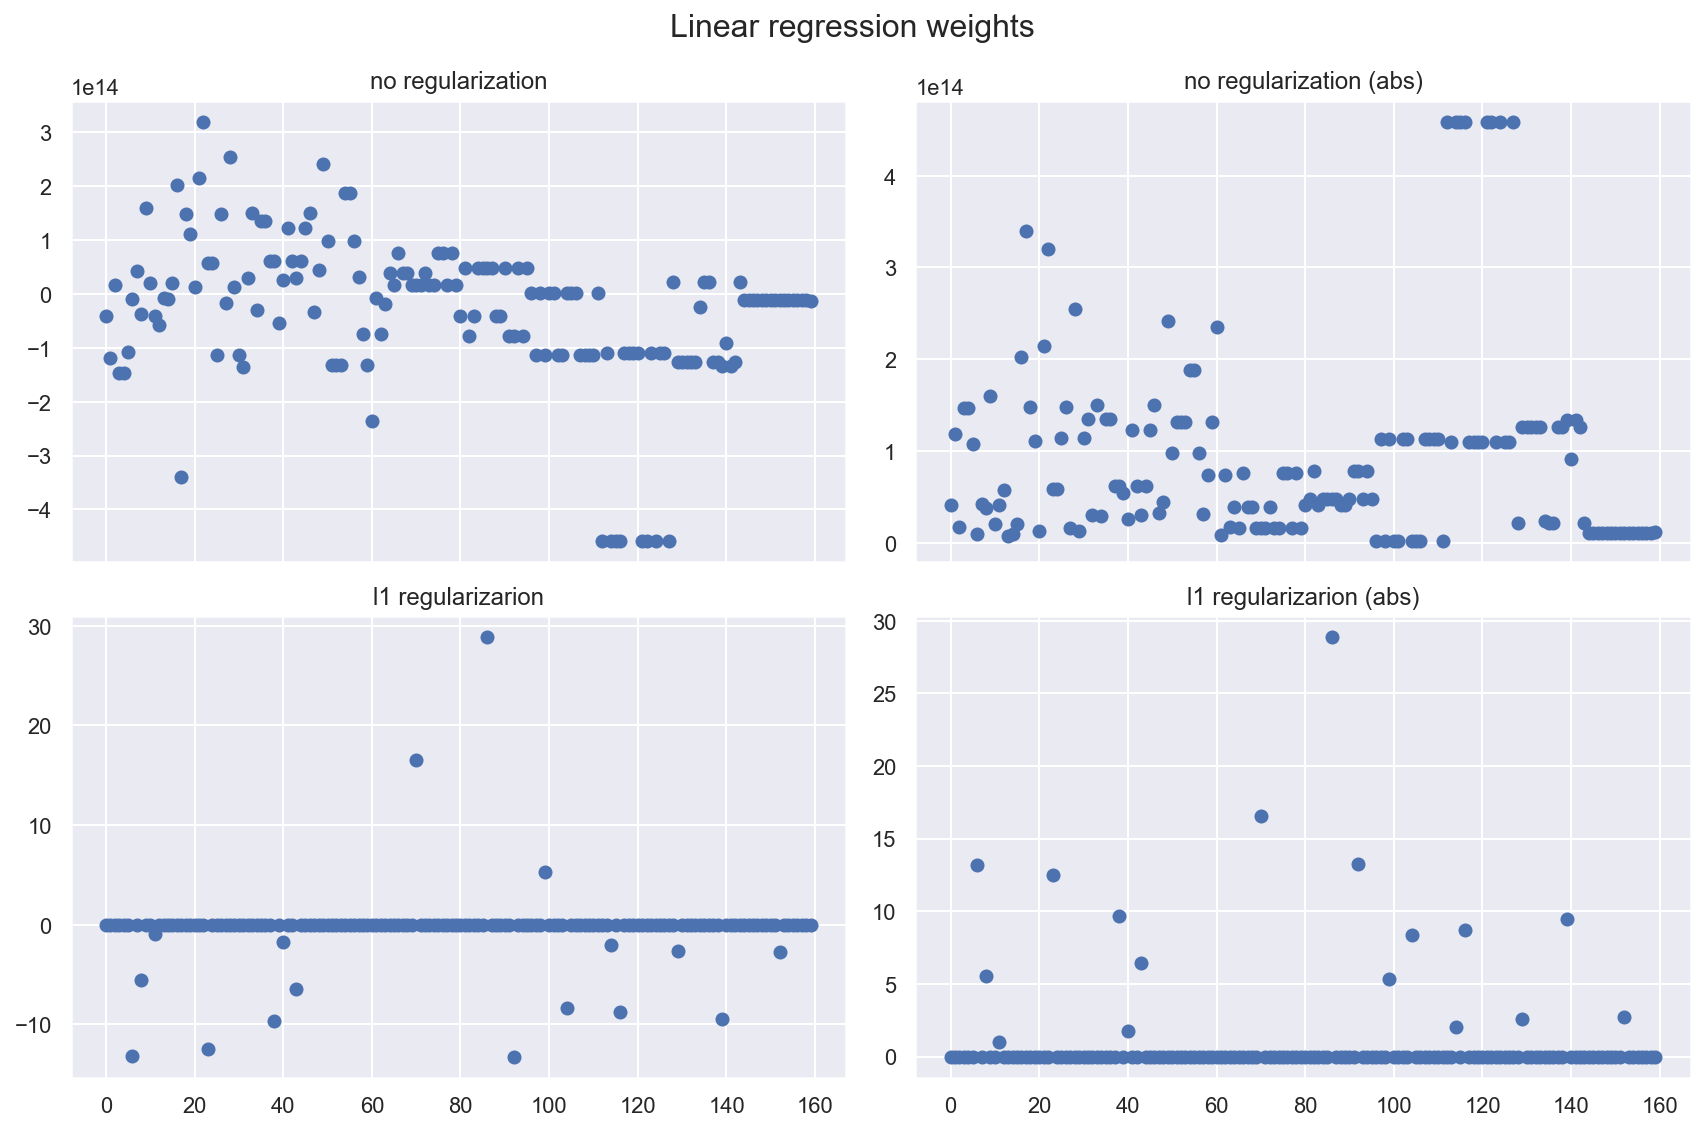

In [20]:
# 200 деревьев => 1 дерево даёт номер листа [0,15]. Значит 1 дерево даёт 16 признаков. Тогда 10 деревьев дадут 160 признаков

fig, axes = plt.subplots(2, 2, figsize=(12,8),sharex=True)
fig.suptitle('Linear regression weights', fontsize=16)

axes[0,0].scatter(np.arange(160), lr.coef_[0:160])
axes[0,1].scatter(np.arange(160), abs(lr.coef_[0:160]))
axes[1,0].scatter(np.arange(160), lr_l1.coef_[0:160])
axes[1,1].scatter(np.arange(160), abs(lr_l1.coef_[0:160]))

axes[0,0].set_title('no regularization')
axes[0,1].set_title('no regularization (abs)')
axes[1,0].set_title('l1 regularizarion')
axes[1,1].set_title('l1 regularizarion (abs)')

plt.tight_layout()

In [21]:
# Как видно из графика у линейной регрессии без регуляризации много огромных весов, что говорит о переобучении.
# Для l1 регуляризации веса кажутся вполне нормальными.
# Пробовал проделать всё тоже самое для l2. Результат гораздо лучше чем у модели без регуляризации , но хуже чем l1.

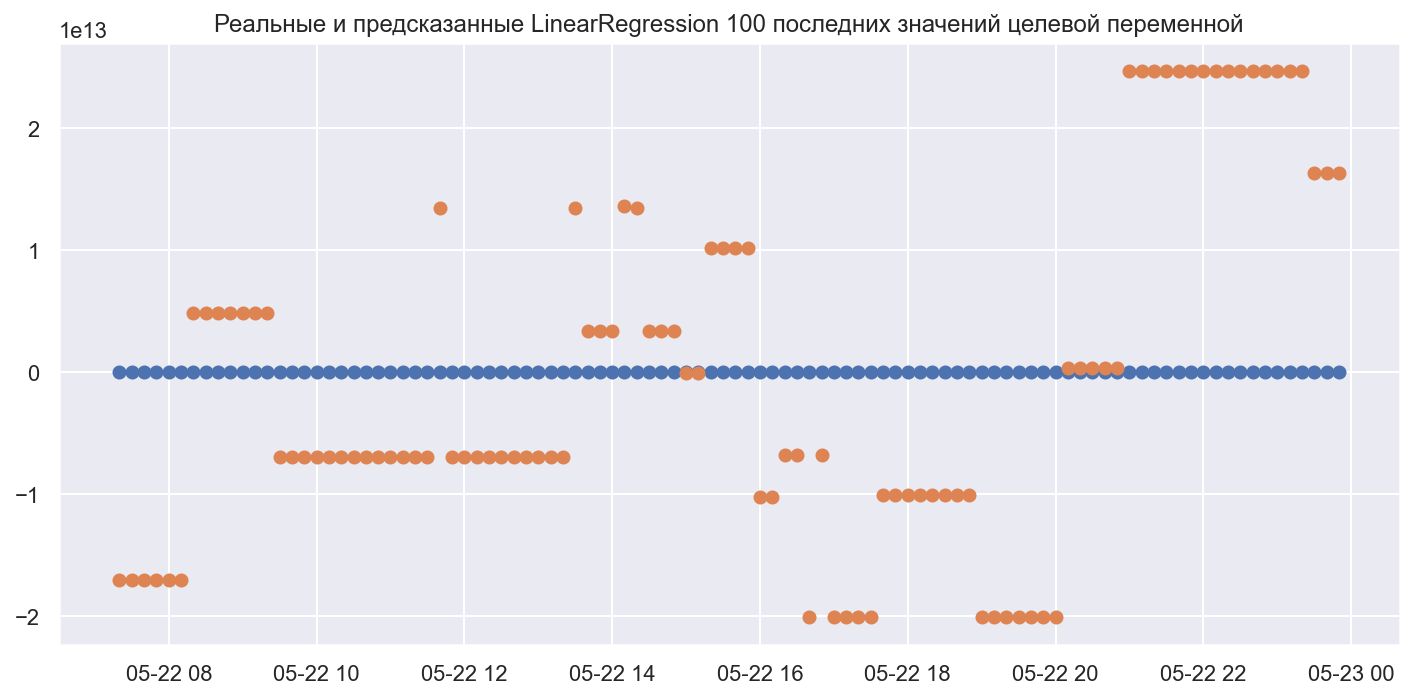

In [22]:
plt.figure(figsize=(10, 5))
plt.title('Реальные и предсказанные LinearRegression 100 последних значений целевой переменной')
plt.scatter(x = X_val.index[-100:], y=y_val[-100:])
plt.scatter(x = X_val.index[-100:], y=lr.predict(val_ohe)[-100:])
plt.tight_layout()

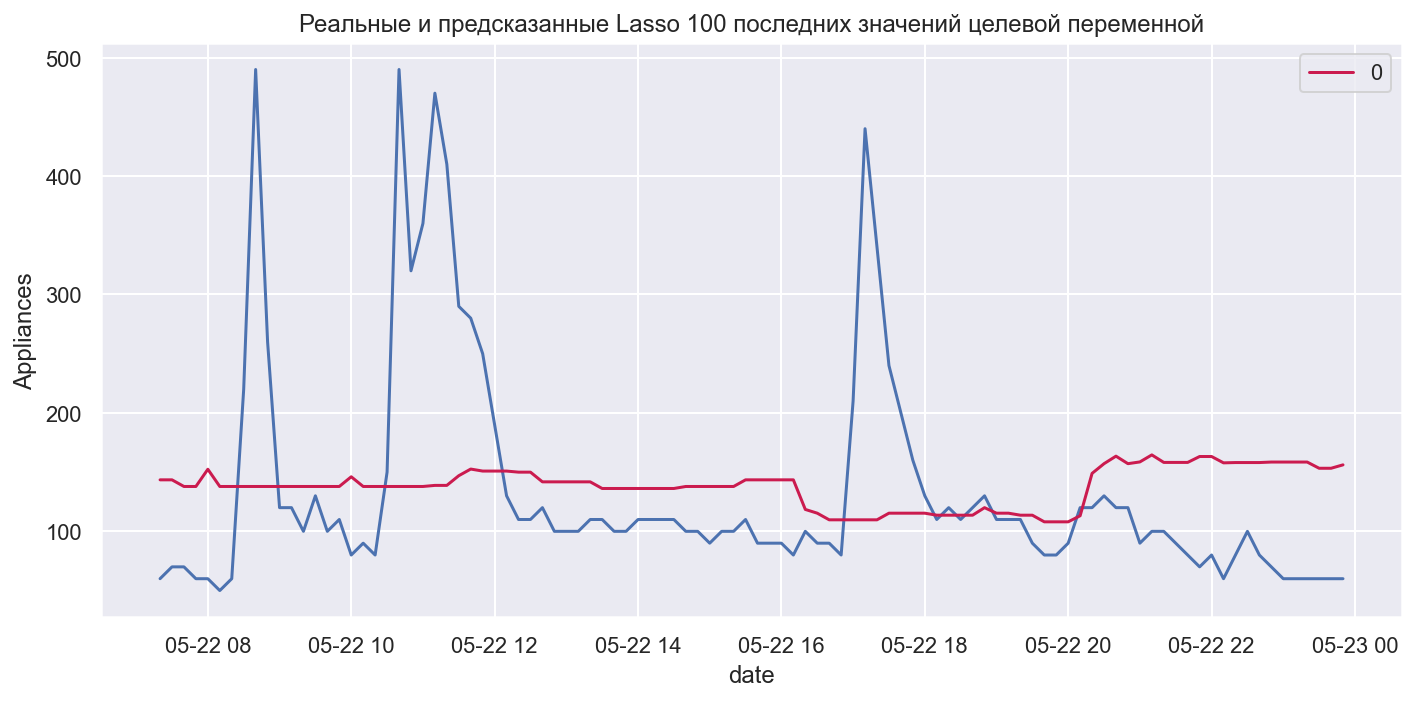

In [23]:
plt.figure(figsize=(10, 5))
plt.title('Реальные и предсказанные Lasso 100 последних значений целевой переменной')
sns.lineplot(data = y_val.sort_index()[-100:])
sns.lineplot(data = pd.DataFrame(lr_l1.predict(val_ohe)[-100:], index=y_val.index[-100:]).sort_index(), palette="rocket")
plt.tight_layout()

 #### Confidence bound

In [24]:
# Сделаем 10_000 наборов предсказанийй для моделей с шумом, не изменяя intercept (bias)

start_coefs = lr_l1.coef_[:]
noise_predicts = [0] * 10_000

for i in range(10_000):
    lr_l1.coef_ = lr_l1.coef_ + np.random.normal (0, 0.4, 3200)
    noise_predicts[i] = lr_l1.predict(val_ohe)
    lr_l1.coef_ = start_coefs
    
noise_predicts = pd.DataFrame(noise_predicts)

# Квантиль уровня 0,05 и 0,95 для нижней и верхней границ соответственно

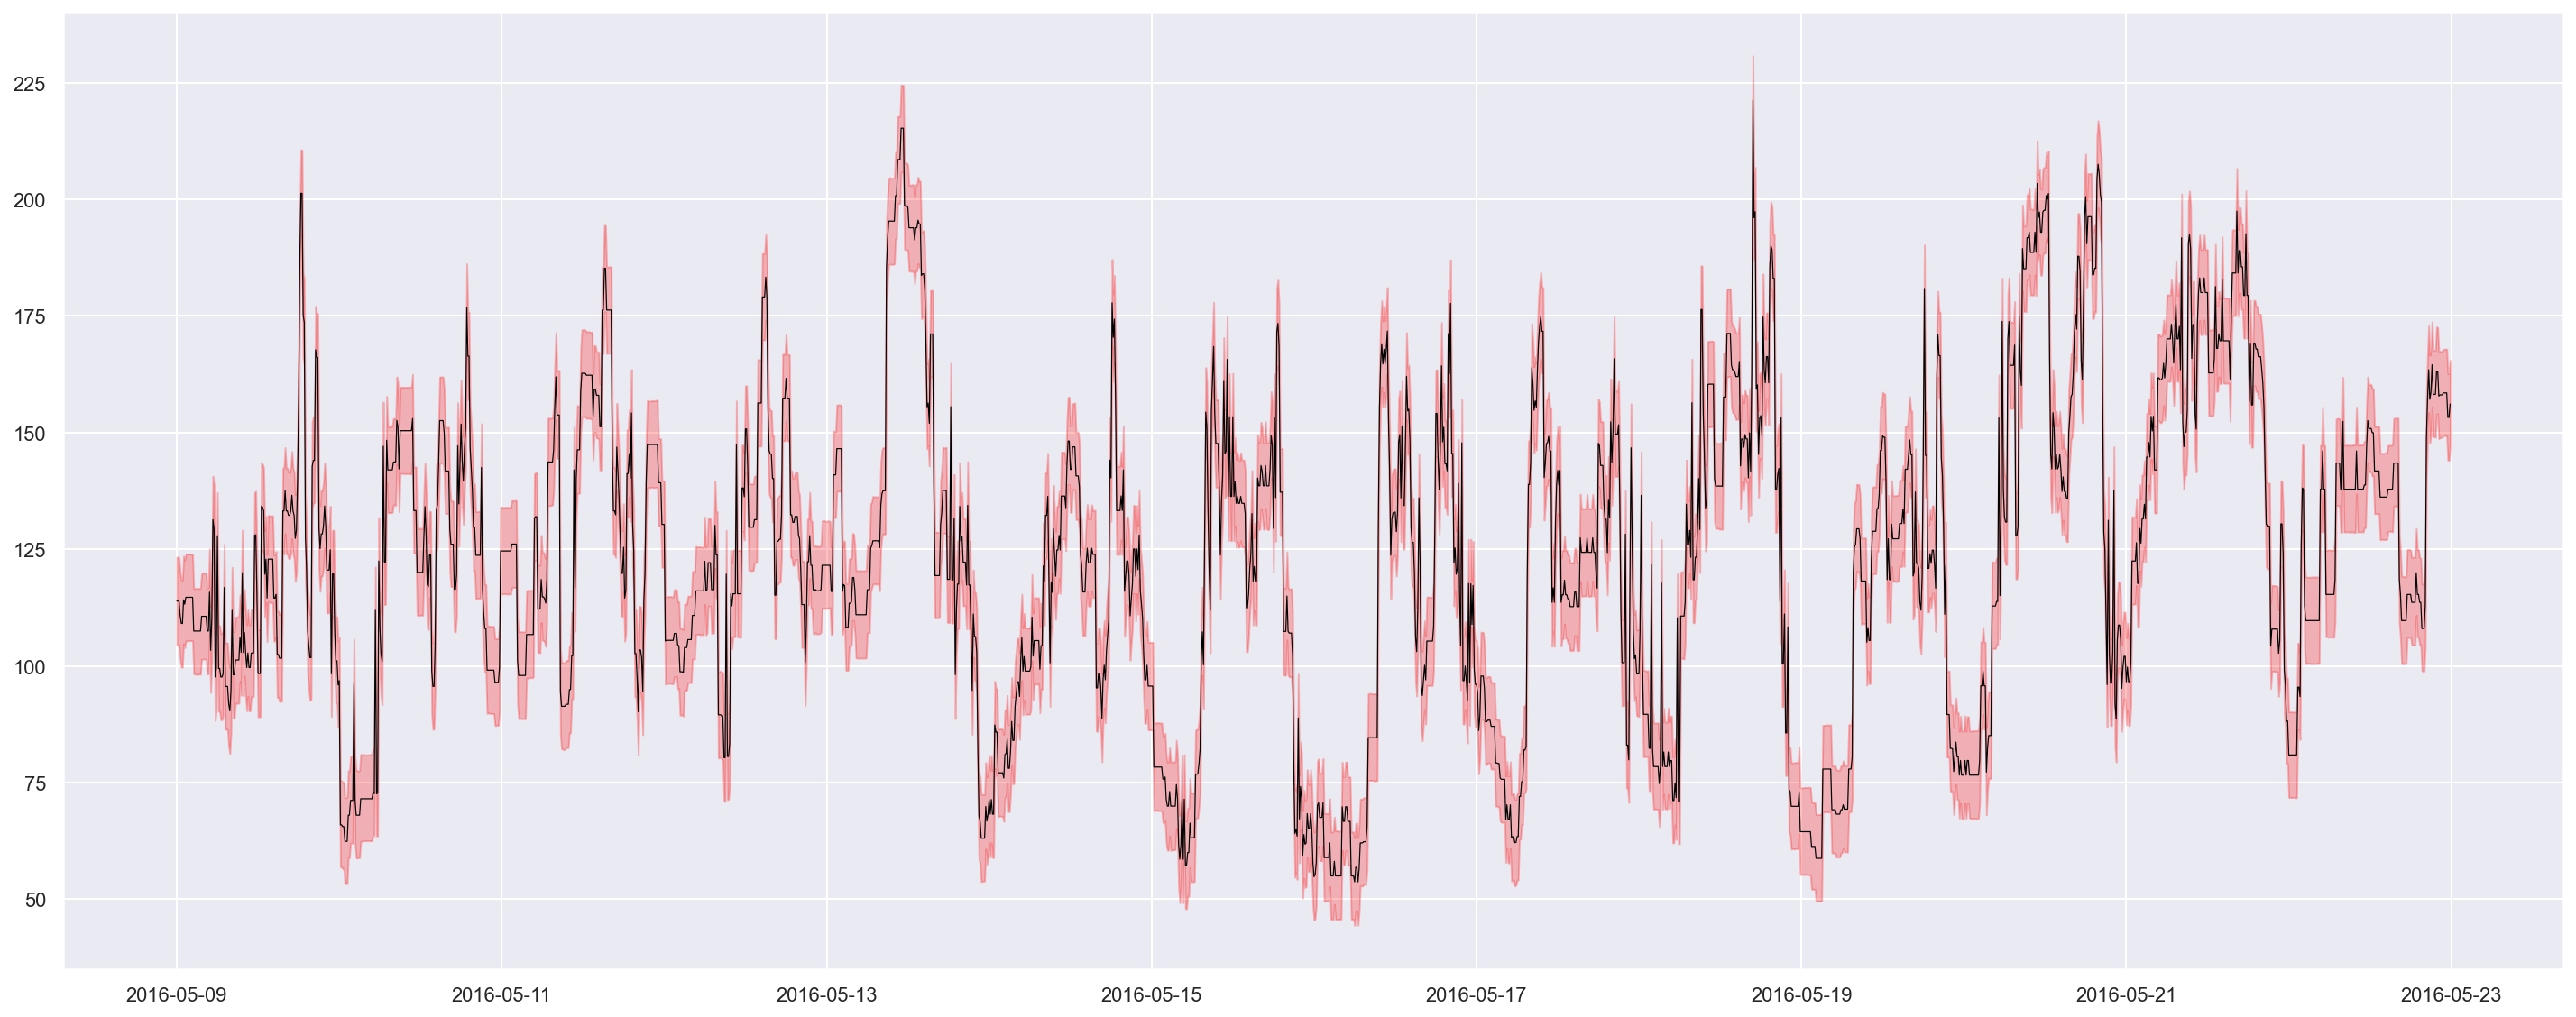

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.fill_between(x=y_val.index, y1=noise_predicts.quantile(q=0.05) , y2=noise_predicts.quantile(q=0.95), color="red", alpha=0.25)
ax.plot(pd.DataFrame(lr_l1.predict(val_ohe), index = y_val.index), linewidth=0.6,color="black")

plt.tight_layout()


In [26]:
print(
    float(((noise_predicts.quantile(q=0.95)-lr_l1.predict(val_ohe)) < 0).value_counts(normalize=True).values),
    float(((noise_predicts.quantile(q=0.05)-lr_l1.predict(val_ohe)) < 0).value_counts(normalize=True).values),
     )

# Все значения попали в доверительный интервал

1.0 1.0


### Quantile Regression

In [29]:
from sklearn.linear_model import QuantileRegressor

# Пытался обучить на трейновой выборке, получал ошибку с аллокацией памяти. Изменение типа данных на np.int8 не помогло.
# Поэтому пришлось обучить хотя бы так :(

qr_median = QuantileRegressor(quantile=0.5, alpha=2/3)
qr_median.fit(val_ohe, y_val)

QuantileRegressor(alpha=0.6666666666666666)

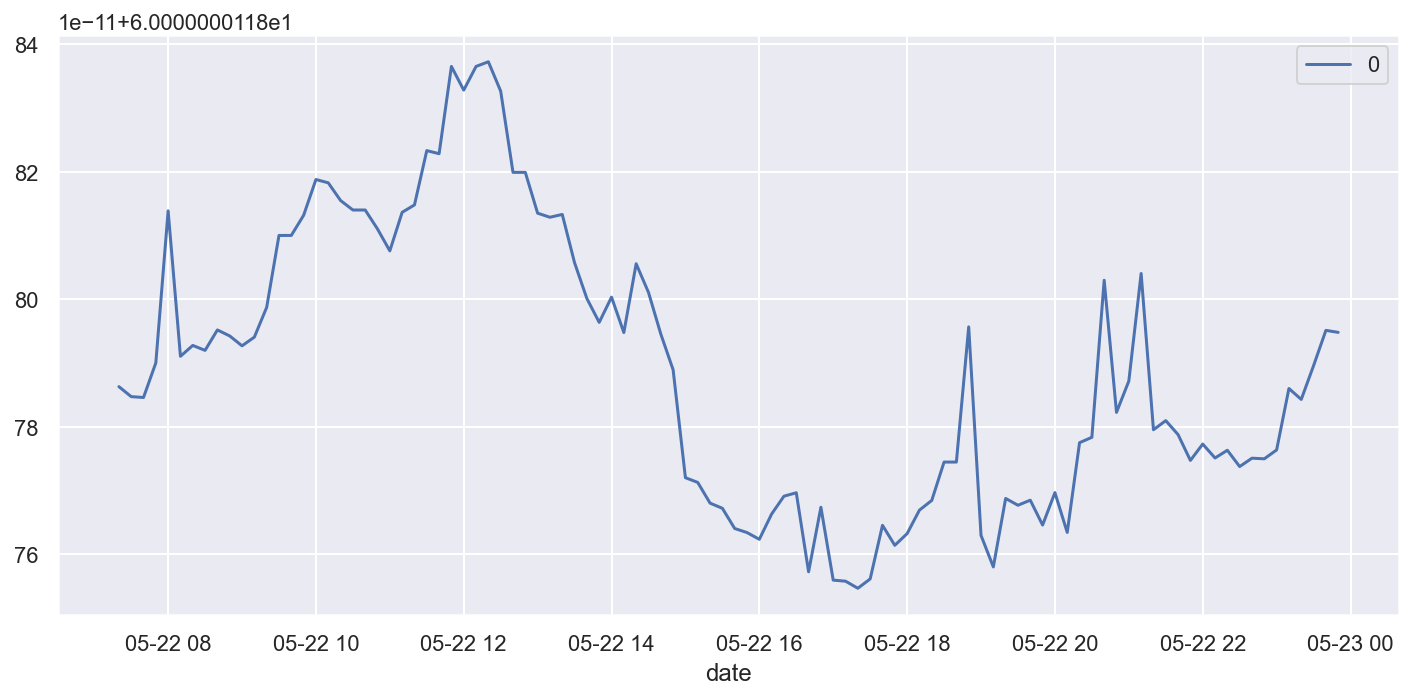

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(data = pd.DataFrame(qr_median.predict(val_ohe)[-100:], index=y_val.index[-100:]).sort_index())
plt.tight_layout()

In [27]:
qr_lower = QuantileRegressor(quantile=0.05, alpha=2/3)
qr_lower.fit(val_ohe, y_val);

qr_upper = QuantileRegressor(quantile=0.95, alpha=2/3)
qr_upper.fit(val_ohe, y_val);